In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('main.db')

In [2]:
authors_df = pd.read_csv('authors.csv')
authors_df.to_sql('authors_raw', conn, if_exists = 'replace')
display(authors_df)

papers_df = pd.read_csv('papers.csv')
papers_df.to_sql('papers_raw', conn, if_exists = 'replace')
display(papers_df)

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN
...,...,...,...,...
30232,8693,Joshua,Wang,Google
30233,2302,Ruho,Kondo,"Toyota Central R&D Labs., Inc."
30234,2302,Keisuke,Kawano,"Toyota Central R&D Labs., Inc"
30235,2302,Satoshi,Koide,Toyota Central R&D Labs.


,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation with Reversible Ind...,The success of generative modeling in continuo...,Discrete Object Generation\n\nwith Reversible ...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning via\n\nAda...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility Location\n\n...
9678,8693,2019,Efficient Rematerialization for Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep Networks\n...


In [ ]:
merged = pd.read_sql_query("select * from authors_raw as a inner join papers_raw as p on a.source_id = p.source_id",conn)

## merged authors and papers, but can't use because kernel is never ending busy 

In [ ]:
merged

In [6]:
paper_count= pd.read_sql_query("SELECT year, COUNT(year) as paper_count FROM papers_raw GROUP BY year ORDER BY 1 asc", conn)
paper_count

,year,paper_count
0,1987,90
1,1988,94
2,1989,101
3,1990,143
4,1991,144
5,1992,127
6,1993,158
7,1994,140
8,1995,152
9,1996,152


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Paper Count')

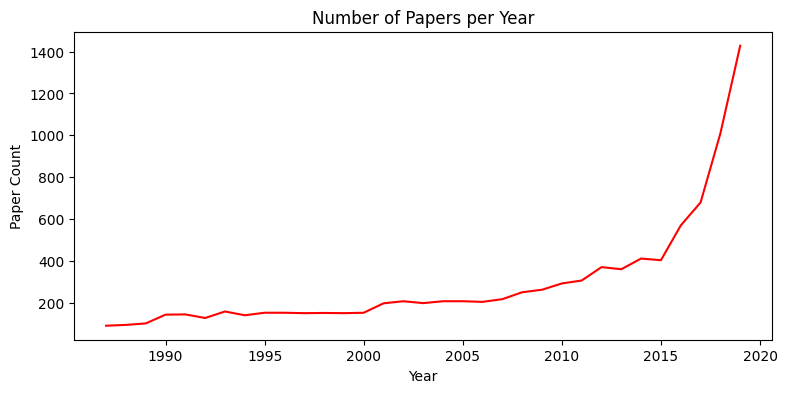

In [8]:
fig = plt.figure(figsize = (9,4))
plt.plot('year','paper_count', data= paper_count,
         color = 'red', linestyle = 'solid')
plt.title('Number of Papers per Year')
plt.xlabel('Year')
plt.ylabel('Paper Count')
        

## Relationship between year and paper count 
as year increase, paper count also increase, positive relationship 

Text(0.5, 1.0, 'Relationship Between Year and Paper Count')

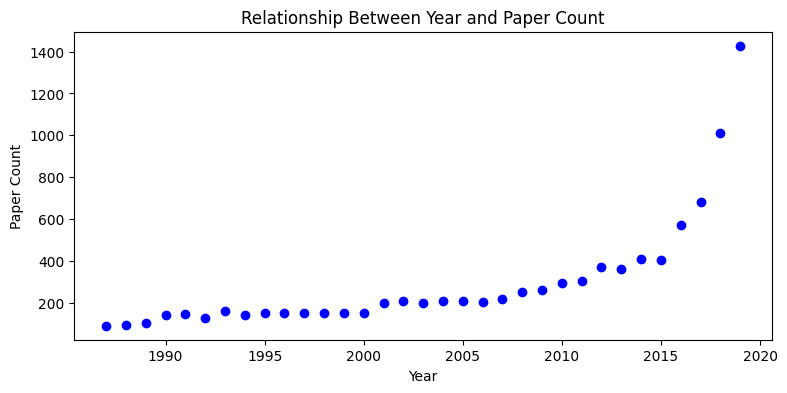

In [9]:
fig = plt.figure(figsize = (9,4))
plt.scatter(paper_count['year'],paper_count['paper_count'],
            color = 'blue', marker = 'o')
plt.xlabel ('Year')
plt.ylabel ('Paper Count')
plt.title ('Relationship Between Year and Paper Count')

In [10]:
top10_published = pd.read_sql_query("select first_name || ' ' || last_name as full_name, count(distinct(source_id)) as num_published from authors_raw group by 1 order by 2 desc limit 10",conn)

## Top 10 author with largest number of book pubished

In [11]:
top10_published

,full_name,num_published
0,Michael Jordan,110
1,Yoshua Bengio,74
2,Bernhard Schölkopf,69
3,Geoffrey Hinton,62
4,Francis Bach,59
5,Zoubin Ghahramani,53
6,Terrence Sejnowski,50
7,Lawrence Carin,50
8,Peter Dayan,49
9,Pradeep Ravikumar,48


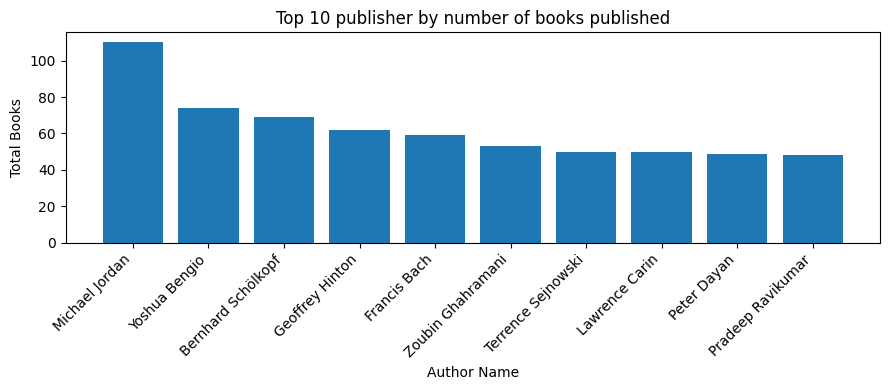

In [12]:
fig = plt.figure(figsize = (9,4))
plt.bar(top10_published['full_name'], top10_published['num_published'])
plt.title('Top 10 publisher by number of books published')
plt.xlabel('Author Name')
plt.ylabel('Total Books')
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()

## Total NaN institution vs Institution

In [29]:
check_institution = pd.read_sql_query("select case when institution is null then 'null' else 'not null' end as institution_status, count (*) as count from authors_raw group by case when institution is null then 'null' else 'not null' end", conn)

In [30]:
check_institution

,institution_status,count
0,not null,17302
1,null,12935


Text(0, 0.5, 'total')

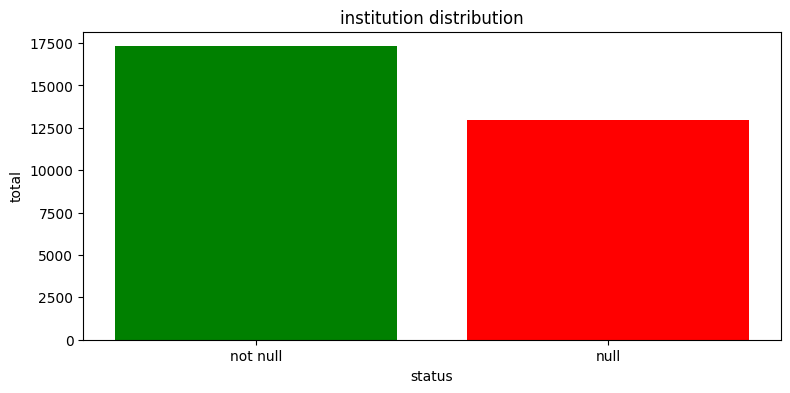

In [45]:
fig = plt.figure(figsize = (9,4))
plt.bar(check_institution['institution_status'], check_institution['count'], data=check_institution, color = ['green','red'])
plt.title('institution distribution')
plt.xlabel('status')
plt.ylabel('total')


In [71]:
top_institution = pd.read_sql_query("select institution, count(*) as count from authors_raw where institution is not null group by 1 order by 2 desc limit 10",conn)

In [72]:
top_institution

,institution,count
0,Stanford University,542
1,MIT,464
2,Carnegie Mellon University,446
3,UC Berkeley,404
4,Google,342
5,Microsoft Research,298
6,DeepMind,269
7,Princeton University,256
8,Duke University,230
9,Columbia University,221


## Top 10 most Institution that most published book

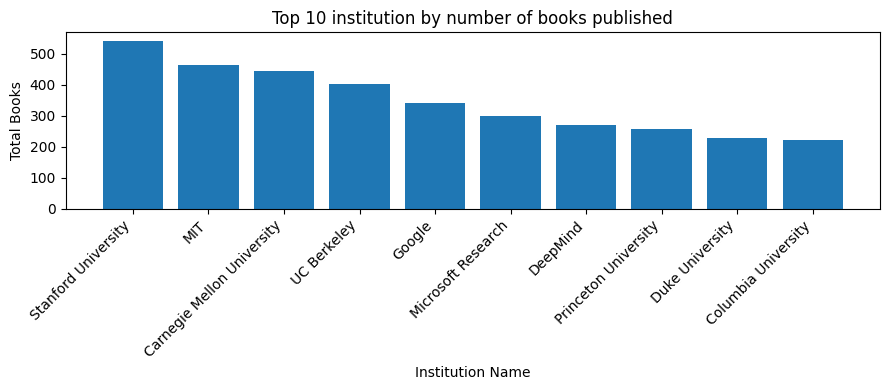

In [80]:
fig = plt.figure(figsize = (9,4))
plt.bar(top_institution['institution'], top_institution['count'])
plt.title('Top 10 institution by number of books published')
plt.xlabel('Institution Name')
plt.ylabel('Total Books')
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()